# 乳癌資料庫預測SVM分類
>使用scikit-learn 機器學習套件裡的SVR演算法

* (一)引入函式庫及內建乳癌資料集<br>
引入之函式庫如下<br>
sklearn.datasets: 用來匯入內建之乳癌資料集`datasets.load_breast_cancer()`<br>
sklearn.SVR: 支持向量機回歸分析之演算法<br>
matplotlib.pyplot: 用來繪製影像

In [24]:
from sklearn import svm
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Step1. 下載資料

In [13]:
breast_cancer=datasets.load_breast_cancer()
breast_cancer.keys()
features=breast_cancer.data
target=breast_cancer.target
print(breast_cancer.keys())
print(breast_cancer["feature_names"])
print(breast_cancer["target_names"])

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


In [16]:
target_names=breast_cancer.target_names
labels=target_names[target]

In [87]:
malignant_mean_radius=features[labels=='malignant',0]
malignant_mean_concavity=features[labels=='malignant',6]
malignant=np.c_[malignant_mean_radius,malignant_mean_concavity]
benign_mean_radius=features[labels=='benign',0]
benign_mean_concavity=features[labels=='benign',6]
benign=np.c_[benign_mean_radius,benign_mean_concavity]
benign

array([[1.354e+01, 6.664e-02],
       [1.308e+01, 4.568e-02],
       [9.504e+00, 2.956e-02],
       [1.303e+01, 2.562e-02],
       [8.196e+00, 1.588e-02],
       [1.205e+01, 6.592e-02],
       [1.349e+01, 4.751e-02],
       [1.176e+01, 1.657e-02],
       [1.364e+01, 1.857e-02],
       [1.194e+01, 1.972e-02],
       [1.152e+01, 3.036e-02],
       [1.305e+01, 6.920e-04],
       [8.618e+00, 2.061e-02],
       [1.017e+01, 1.084e-02],
       [8.598e+00, 3.000e-02],
       [9.173e+00, 5.988e-02],
       [9.465e+00, 2.172e-02],
       [1.131e+01, 3.709e-02],
       [9.029e+00, 3.130e-01],
       [1.278e+01, 3.653e-02],
       [8.888e+00, 8.606e-02],
       [1.231e+01, 3.372e-02],
       [1.353e+01, 6.877e-02],
       [1.286e+01, 3.889e-02],
       [1.145e+01, 4.591e-02],
       [1.334e+01, 1.169e-01],
       [1.200e+01, 4.151e-02],
       [1.236e+01, 6.015e-02],
       [1.464e+01, 9.966e-02],
       [1.462e+01, 3.102e-02],
       [1.327e+01, 3.261e-02],
       [1.345e+01, 3.974e-02],
       [

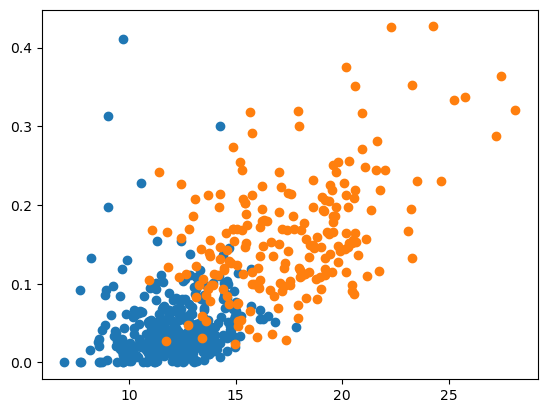

In [88]:
plt.scatter(benign[:,0],benign[:,1])
plt.scatter(malignant[:,0],malignant[:,1])

## Step2. 區分訓練集與測試集

In [90]:
training_data=np.r_[malignant, benign]
training_labels=np.r_[np.zeros(len(malignant)),np.ones(len(benign))]
X_train, X_test, y_train, y_test = train_test_split(training_data,training_labels,test_size=0.3,random_state=101)

## Step3. 建模

In [97]:
def SVM_plot(clf,title):
    training_x_min=training_data[:,0].min()-1
    training_x_max=training_data[:,0].max()+1
    training_y_min=training_data[:,1].min()-1
    training_y_max=training_data[:,1].max()+1
    grid_interval=0.02
    xx,yy=np.meshgrid(np.arange(training_x_min,training_x_max,grid_interval),np.arange(training_y_min,training_y_max,grid_interval))
    
    Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z=Z.reshape(xx.shape)
    plt.contourf(xx,yy,Z,cmap=plt.cm.bone,alpha=0.2)
    plt.autoscale()
    plt.grid()
    plt.scatter(benign[:,0],benign[:,1])
    plt.scatter(malignant[:,0],malignant[:,1])
    plt.title(title)
    plt.show()

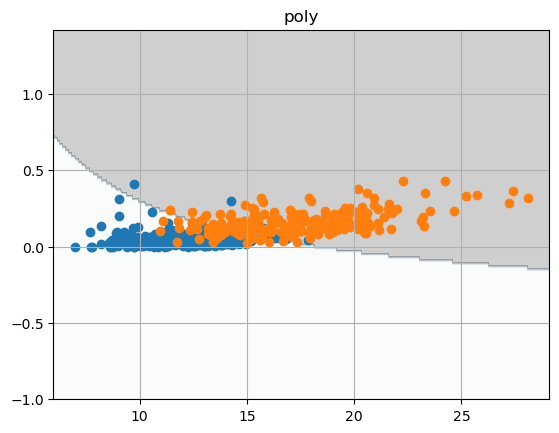

In [98]:
clf=svm.SVC(kernel='poly',gamma='auto',C=100)
clf.fit(X_train,y_train)
SVM_plot(clf,'poly')

## Step4. 預測

```

```


In [99]:
clf.predict(X_test)

array([0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0.,
       0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1.,
       1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0.,
       1.])

## Step5. 準確度分析

In [100]:
print(clf.score(X_train,y_train))
print(clf.score(X_test, y_test))

0.907035175879397
0.935672514619883
